In [1]:
import pandas as pd
import seaborn as sns
import sys
%matplotlib inline 
import matplotlib.pyplot as plt


##towards_rankspace output##

infile='tr_sub_CpGdelta_info.txt'
outname=infile

howmanytop=1000

indf=pd.read_csv(infile,sep='\t')
indf.set_index(['chrom','start','end'],inplace=True)
indf.head()

Tregs-NaiveCD8  Tregs-cm8  Tregs-NaiveCD4  maxdelta  \
chrom start  end                                                           
chr1  686388 686390        0.333000     0.3330        0.041667  0.333000   
      687193 687195       -0.237500     0.0315       -0.153833  0.031500   
      687328 687330       -0.323333     0.0280       -0.347000  0.028000   
      922981 922983       -0.011167    -0.0125       -0.023833 -0.011167   
      922991 922993       -0.045000    -0.0305       -0.056000 -0.030500   

                     mindelta  Avgdelta  
chrom start  end                         
chr1  686388 686390  0.041667  0.235889  
      687193 687195 -0.237500 -0.119944  
      687328 687330 -0.347000 -0.214111  
      922981 922983 -0.023833 -0.015833  
      922991 922993 -0.056000 -0.043833

In [2]:
indf=indf[indf['maxdelta']<0]
indf.head()

Tregs-NaiveCD8  Tregs-cm8  Tregs-NaiveCD4  maxdelta  \
chrom start  end                                                           
chr1  922981 922983       -0.011167    -0.0125       -0.023833 -0.011167   
      922991 922993       -0.045000    -0.0305       -0.056000 -0.030500   
      923025 923027       -0.101000    -0.0165       -0.125000 -0.016500   

                     mindelta  Avgdelta  
chrom start  end                         
chr1  922981 922983 -0.023833 -0.015833  
      922991 922993 -0.056000 -0.043833  
      923025 923027 -0.125000 -0.080833

In [3]:
indf=-1*indf
indf.head()

Tregs-NaiveCD8  Tregs-cm8  Tregs-NaiveCD4  maxdelta  \
chrom start  end                                                           
chr1  922981 922983        0.011167     0.0125        0.023833  0.011167   
      922991 922993        0.045000     0.0305        0.056000  0.030500   
      923025 923027        0.101000     0.0165        0.125000  0.016500   

                     mindelta  Avgdelta  
chrom start  end                         
chr1  922981 922983  0.023833  0.015833  
      922991 922993  0.056000  0.043833  
      923025 923027  0.125000  0.080833

In [4]:
indf.rename(columns={'maxdelta':'Minimum delta','mindelta':'Maximum delta','Avgdelta':'Average delta'},inplace=True)
indf.head()

Tregs-NaiveCD8  Tregs-cm8  Tregs-NaiveCD4  Minimum delta  \
chrom start  end                                                                
chr1  922981 922983        0.011167     0.0125        0.023833       0.011167   
      922991 922993        0.045000     0.0305        0.056000       0.030500   
      923025 923027        0.101000     0.0165        0.125000       0.016500   

                     Maximum delta  Average delta  
chrom start  end                                   
chr1  922981 922983       0.023833       0.015833  
      922991 922993       0.056000       0.043833  
      923025 923027       0.125000       0.080833

In [5]:
indf['(Minimum delta+Average delta)/2']=(indf['Minimum delta']+indf['Average delta'])/2
indf.head()

Tregs-NaiveCD8  Tregs-cm8  Tregs-NaiveCD4  Minimum delta  \
chrom start  end                                                                
chr1  922981 922983        0.011167     0.0125        0.023833       0.011167   
      922991 922993        0.045000     0.0305        0.056000       0.030500   
      923025 923027        0.101000     0.0165        0.125000       0.016500   

                     Maximum delta  Average delta  \
chrom start  end                                    
chr1  922981 922983       0.023833       0.015833   
      922991 922993       0.056000       0.043833   
      923025 923027       0.125000       0.080833   

                     (Minimum delta+Average delta)/2  
chrom start  end                                      
chr1  922981 922983                         0.013500  
      922991 922993                         0.037167  
      923025 923027                         0.048667

In [6]:
outdf=indf.sort_values('(Minimum delta+Average delta)/2',ascending=False)
outdf.head()

Tregs-NaiveCD8  Tregs-cm8  Tregs-NaiveCD4  Minimum delta  \
chrom start  end                                                                
chr1  923025 923027        0.101000     0.0165        0.125000       0.016500   
      922991 922993        0.045000     0.0305        0.056000       0.030500   
      922981 922983        0.011167     0.0125        0.023833       0.011167   

                     Maximum delta  Average delta  \
chrom start  end                                    
chr1  923025 923027       0.125000       0.080833   
      922991 922993       0.056000       0.043833   
      922981 922983       0.023833       0.015833   

                     (Minimum delta+Average delta)/2  
chrom start  end                                      
chr1  923025 923027                         0.048667  
      922991 922993                         0.037167  
      922981 922983                         0.013500

In [7]:
outdfcolnames=(outdf.columns).tolist()
scorcols=[s for s in outdfcolnames if '-' in s]
scorcols

['Tregs-NaiveCD8', 'Tregs-cm8', 'Tregs-NaiveCD4']

In [8]:
def renamect(act):
    if act=='CD4':
        return 'Naive CD4 T'
    if act=='CD8':
        return 'Naive CD8 T'

    if act=='NaiveCD4':
        return 'Naive CD4 T'
    if act=='NaiveCD8':
        return 'Naive CD8 T'
    if act=='Tr':
        return 'Tregs'
    if act=='mB':
        return 'Memory B'
    if act=='nB':
        return 'Naive B'
    if act=='m4':
        return 'Memory CD4 T'
    if act=='m8':
        return 'Memory CD8 T'
    if act=='Mn':
        return 'Mono'


    if act=='em8':
        return 'CD8 TEM'
    if act=='cm8':
        return 'CD8 TCM'

    if act=='em4':
        return 'CD4 TEM'
    if act=='cm4':
        return 'CD4 TCM'


    if act=='ed8':
        return 'CD8 TEMRA'

    if act=='PC':
        return 'PC'

    if act=='M0':
        return 'Macrophage (M0)'

    if act=='M1':
        return 'Macrophage (M1)'

    if act=='M2':
        return 'Macrophage (M2)'
    if act=='Eo':
        return 'Eosinophil'

    if act=='Mg':
        return 'Megakaryocyte'




    return act

In [9]:

newscorecols=[]
score_rename_dict={}
for score in scorcols:
    scoreplit=score.split("-")
    c1=renamect(scoreplit[0])
    c2=renamect(scoreplit[1])
  
    newscorename=c1+"-"+c2
    score_rename_dict[score]=newscorename
    
    newscorecols.append(newscorename)
    
score_rename_dict    

{'Tregs-NaiveCD8': 'Tregs-Naive CD8 T',
 'Tregs-cm8': 'Tregs-CD8 TCM',
 'Tregs-NaiveCD4': 'Tregs-Naive CD4 T'}

In [10]:
outdf.rename(columns=score_rename_dict,inplace=True)
outdf.head()

Tregs-Naive CD8 T  Tregs-CD8 TCM  Tregs-Naive CD4 T  \
chrom start  end                                                           
chr1  923025 923027           0.101000         0.0165           0.125000   
      922991 922993           0.045000         0.0305           0.056000   
      922981 922983           0.011167         0.0125           0.023833   

                     Minimum delta  Maximum delta  Average delta  \
chrom start  end                                                   
chr1  923025 923027       0.016500       0.125000       0.080833   
      922991 922993       0.030500       0.056000       0.043833   
      922981 922983       0.011167       0.023833       0.015833   

                     (Minimum delta+Average delta)/2  
chrom start  end                                      
chr1  923025 923027                         0.048667  
      922991 922993                         0.037167  
      922981 922983                         0.013500

In [11]:
outdfforheat=outdf.copy()
if outdfforheat.shape[0]>howmanytop:
    outdfforheat=outdfforheat.head(n=howmanytop)


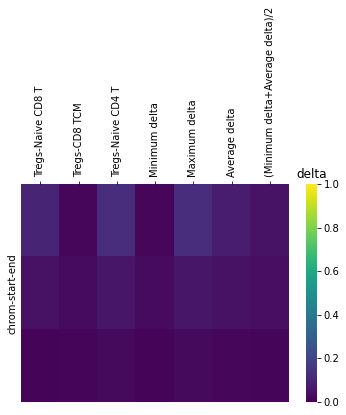

In [12]:
mycmap = plt.cm.viridis
mycmap.set_bad("dimgrey")
aaa=sns.heatmap(outdfforheat, cmap=mycmap,vmin=0, vmax=1,yticklabels=False)

aaa.xaxis.tick_top()

aaa.set_xticklabels(aaa.get_xticklabels(),rotation = 90)

cbar = aaa.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('delta')
heatname=outname+"_heat"+".pdf"
plt.savefig(heatname,bbox_inches = "tight")

In [13]:
outdf=outdf.sort_values('Minimum delta',ascending=False)
outdf.reset_index(inplace=True)
outdf.reset_index(inplace=True)
outdf.head()

index chrom   start     end  Tregs-Naive CD8 T  Tregs-CD8 TCM  \
0      0  chr1  922991  922993           0.045000         0.0305   
1      1  chr1  923025  923027           0.101000         0.0165   
2      2  chr1  922981  922983           0.011167         0.0125   

   Tregs-Naive CD4 T  Minimum delta  Maximum delta  Average delta  \
0           0.056000       0.030500       0.056000       0.043833   
1           0.125000       0.016500       0.125000       0.080833   
2           0.023833       0.011167       0.023833       0.015833   

   (Minimum delta+Average delta)/2  
0                         0.037167  
1                         0.048667  
2                         0.013500

In [14]:
outdf.rename(columns={'index':'Minimum delta rank'},inplace=True)
outdf.set_index(['chrom','start','end'],inplace=True)
outdf.head()

Minimum delta rank  Tregs-Naive CD8 T  Tregs-CD8 TCM  \
chrom start  end                                                            
chr1  922991 922993                   0           0.045000         0.0305   
      923025 923027                   1           0.101000         0.0165   
      922981 922983                   2           0.011167         0.0125   

                     Tregs-Naive CD4 T  Minimum delta  Maximum delta  \
chrom start  end                                                       
chr1  922991 922993           0.056000       0.030500       0.056000   
      923025 923027           0.125000       0.016500       0.125000   
      922981 922983           0.023833       0.011167       0.023833   

                     Average delta  (Minimum delta+Average delta)/2  
chrom start  end                                                     
chr1  922991 922993       0.043833                         0.037167  
      923025 923027       0.080833                         0.048667  
      922981 922983       0.015833                         0.013500

In [15]:
outdf=outdf.sort_values('Average delta',ascending=False)
outdf.reset_index(inplace=True)
outdf.reset_index(inplace=True)
outdf.rename(columns={'index':'Average delta rank'},inplace=True)
outdf.set_index(['chrom','start','end'],inplace=True)
outdf.head()

Average delta rank  Minimum delta rank  \
chrom start  end                                              
chr1  923025 923027                   0                   1   
      922991 922993                   1                   0   
      922981 922983                   2                   2   

                     Tregs-Naive CD8 T  Tregs-CD8 TCM  Tregs-Naive CD4 T  \
chrom start  end                                                           
chr1  923025 923027           0.101000         0.0165           0.125000   
      922991 922993           0.045000         0.0305           0.056000   
      922981 922983           0.011167         0.0125           0.023833   

                     Minimum delta  Maximum delta  Average delta  \
chrom start  end                                                   
chr1  923025 923027       0.016500       0.125000       0.080833   
      922991 922993       0.030500       0.056000       0.043833   
      922981 922983       0.011167       0.023833       0.015833   

                     (Minimum delta+Average delta)/2  
chrom start  end                                      
chr1  923025 923027                         0.048667  
      922991 922993                         0.037167  
      922981 922983                         0.013500

In [16]:
outdf['(Minimum delta rank+Average delta rank)/2']=(outdf['Minimum delta rank']+outdf['Average delta rank'])/2
outdf=outdf.sort_values('(Minimum delta rank+Average delta rank)/2')
outdf.head()

Average delta rank  Minimum delta rank  \
chrom start  end                                              
chr1  923025 923027                   0                   1   
      922991 922993                   1                   0   
      922981 922983                   2                   2   

                     Tregs-Naive CD8 T  Tregs-CD8 TCM  Tregs-Naive CD4 T  \
chrom start  end                                                           
chr1  923025 923027           0.101000         0.0165           0.125000   
      922991 922993           0.045000         0.0305           0.056000   
      922981 922983           0.011167         0.0125           0.023833   

                     Minimum delta  Maximum delta  Average delta  \
chrom start  end                                                   
chr1  923025 923027       0.016500       0.125000       0.080833   
      922991 922993       0.030500       0.056000       0.043833   
      922981 922983       0.011167       0.023833       0.015833   

                     (Minimum delta+Average delta)/2  \
chrom start  end                                       
chr1  923025 923027                         0.048667   
      922991 922993                         0.037167   
      922981 922983                         0.013500   

                     (Minimum delta rank+Average delta rank)/2  
chrom start  end                                                
chr1  923025 923027                                        0.5  
      922991 922993                                        0.5  
      922981 922983                                        2.0

In [17]:
outdfforheatRANKED=outdf.copy()
if outdfforheatRANKED.shape[0]>howmanytop:
    outdfforheatRANKED=outdfforheatRANKED.head(n=howmanytop)

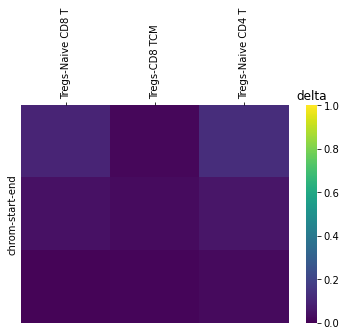

In [18]:

aaa=sns.heatmap(outdfforheatRANKED[newscorecols],vmin=0, vmax=1, cmap=mycmap,yticklabels=False) #vmin=0, vmax=1,

aaa.xaxis.tick_top()

aaa.set_xticklabels(aaa.get_xticklabels(),rotation = 90)

cbar = aaa.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('delta')
heatname=outname+"_heat_RANKED"+".pdf"
plt.savefig(heatname,bbox_inches = "tight")

In [19]:

outdf.reset_index(inplace=True)
outdfforheat.reset_index(inplace=True)
outdfforheatRANKED.reset_index(inplace=True)
outdf.to_csv(outname+"_forheatfullinfo.txt",sep='\t',index=False)
outdfforheat.to_csv(outname+"_forheatunderlyingdata.txt",sep='\t',index=False)

outdfforheatRANKED.to_csv(outname+"_forheatunderlyingdata_ranked.txt",sep='\t',index=False)
outdfforheatRANKED[['chrom','start','end']].to_csv(outname+"_forheatunderlyingdata_ranked_pos.txt",sep='\t',index=False,header=False)